# INN Hotels Project

## Context

Booking cancellations are the bane of hotel businesses. Many hotels have to grapple with customers canceling bookings for a number of reasons such as change in plans, getting better deals from the competition, indecisiveness of potential customers etc. Usually, the business model for the hotel industry allows customers to easily make bookings and cancel bookings. However, these cancellations affect the industry even though it is benefical to potential customers and guests. Depending on the season, most hotels usually allow guests to cancel free of charge or at a low cost even at last minute. One major disadvantage is that hoteliers make plans and preparation for guests from bookings and incur costs based on these preparations which may still be canceled at last minute and at no charge to the guests.

New technologies in the hotel business has brought improvement, for example, ease of bookings, real-time communication with guests, management softwares, payment processing etc. However, these gifts to the customers has also posed some challenges to the hoteliers. The ease of bookings and improved search engine optimisations mean that customers can easily shop, find new deals, cancel prior bookings and make new reservations.

Hotel booking cancellations affect hotels in various ways:
* Marketing and distribution costs. Commissions are paid by hotels to 3rd-party distribution channels upon booking confirmation and not refunded if bookings get canceled.
* Hotels lose money when reserved rooms cannot be be resold after last minute booking cancellations.
* Reduction in profit margins when hotels have to drop prices last minute to incentivise potential customers.
* Human resources to make arrangements for the guests.

## Objective
INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations.
A predictive model which is able to predict in advance which bookings will be canceled will be built to classify the booking into 2 categories - canceled and not canceled. Also, the model will be used to determine which features are most likely to influence booking cancellations.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn.metrics import (
   f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Mount the drive from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read the data**

In [ ]:
# Read the data and create a DataFrame
hotel = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 4 - Logistic Regression/Project/INNHotelsGroup.csv')

Copy the hotel.csv file

In [ ]:
# assign the data to 'data' variable to avoid any changes to the original data
data = hotel.copy()

**Display the top and bottom 5 rows.**

In [ ]:
# return the first 5 rows and check consistency
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
# return the last 5 rows and check consistency
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


Observations:

The DataFrame has 19 columns as listed in the Data Dictionary. Data in each row corresponds to Booking ID, no. of adults, no.of children, no. of weekend, no of week nights, required car space, room type reserved, lead time, arrival year, arrival month, arrival date, market segment type, repeated guest, no of previous cancellations, no. of previous bookings, average price per room, no. of special requests, and booking status.
Data in each row is consistent with the corresponding column headings.

In [ ]:
# see the total number of entries (that is, rows and columns)
data.shape

(36275, 19)

Observations:

* The DataFrame has 36,275 rows and 19 columns. This represents the customer hotel booking behaviour.

In [ ]:
# print the summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Observations:

- There are no null observations in the dataset.

- The dataset contains 19 columns: 13 are of integer type ('no. of adults', 'no.of children', 'no. of weekend', 'no of week nights', 'lead time', 'arrival month', 'arrival date', 'arrival year', no. of previous cancellations', no. of previous bookings not canceled', 'no. of special requests'), 5 are of object type ('Booking ID', 'type of meal plan', 'type of room reserved', 'market segment type', 'booking status') and 1 of float type ('avg price per room').

- Total memory usage is approximately 5.3 MB.

Check if there are any duplicated entries.

In [ ]:
# check if there are any duplicates across any rows in the entries
data.duplicated().sum()

0

Observations:

* There are no duplicate entries in the dataset.

Check if there are any missing entries.

In [ ]:
# check for missing values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Observations:

* There are no missing entries in the dataset.

In [ ]:
# Drop the Booking_ID colummn
data = data.drop(["Booking_ID"], axis=1)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Booking ID entries is merely an identification and it does provide any additional information required for the analysis.
Therefore, it has been dropped from the dataframe.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

Display the summary statistics of the numerical columns.

In [ ]:
# Get the summary statistics of the numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


Observations:

* The highest number of people in an adult group is 4

* The highest number of children in a booking is 10.

* The longest number of weekend nights booked is 7 nights. Only 25% of weekend night bookings are greater than 2 nights while 75% of people booked for one weekend night.

* 50% of bookings are for week nights while the longest booking is for 17 weeknights.

* Most customers only request for 1 parking space.

* 50% of customers book at least almost 2 months in advance. Some customers even book up to 1 year in advance.

* The arrival months and days will be explored subsequently. However, the dataset consists of bookings placed in 2017 and 2018.

* The rate of guest returns will be explored subsequently.

* Most customers did not previously cancel bookings.

* 50% of rooms cost approximately 100 Euros.

* Only 25% of customers wanted a special request.

### Univariate Analysis

Write a function to plot the histograms and boxplots.

In [ ]:
# Define a function to plot histograms and boxplots
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Lead Time

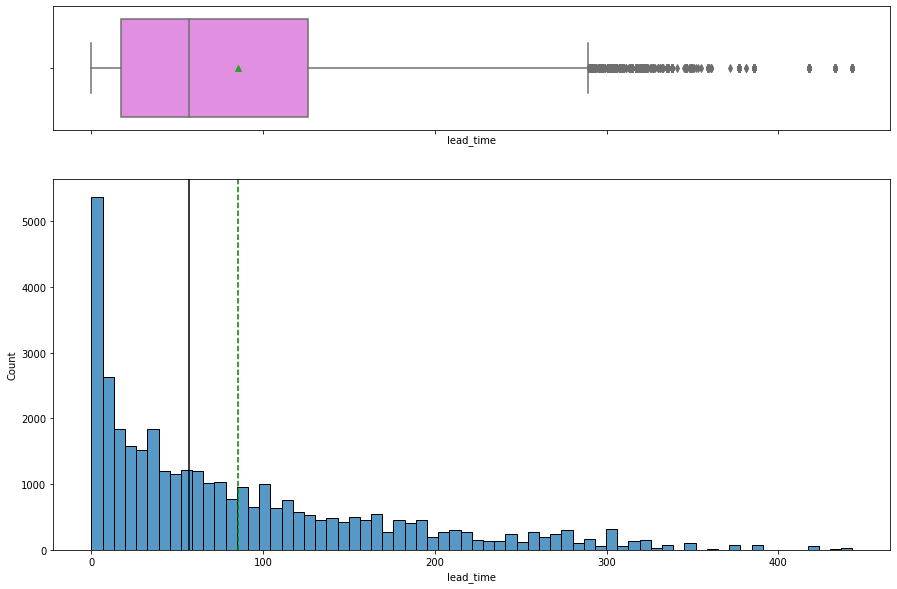

In [ ]:
# Create the boxplot and histogram for the lead time
histogram_boxplot(data, "lead_time")

Observations:

- From the histrogram, the distribution of lead time is right-skewed.

- The lead time for most customers is between 0 to 120 days. However, there exist some outliers beyond 300 days.



#### Average Price Per Room

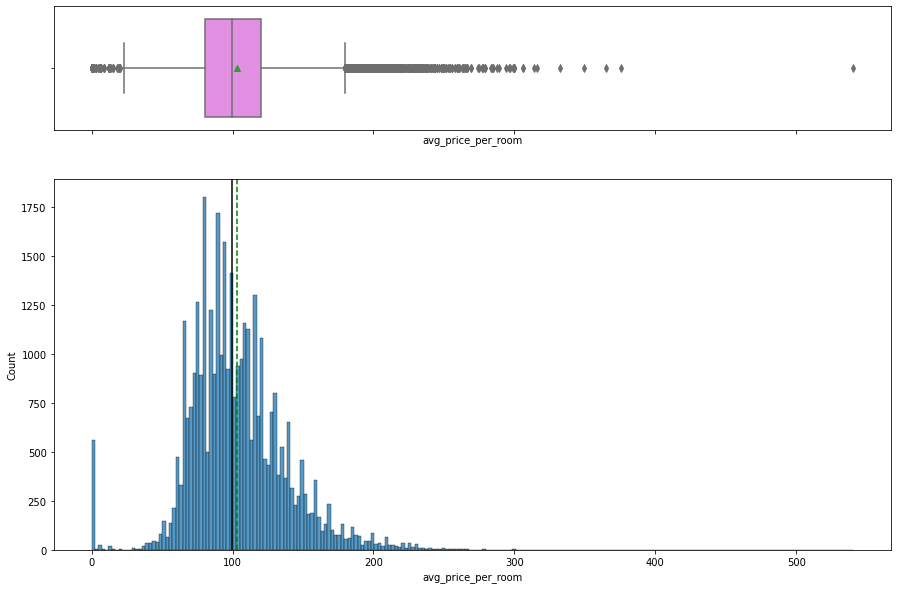

In [ ]:
# Create the boxplot and histogram for the average price per room
histogram_boxplot(data, "avg_price_per_room")

Observations:

- From the histrogram, the distribution of average price per room is slightly right-skewed.

- Average price of rooms on most days is between 70 and 140 Euros.

- There are some days when average room prices exceed 300 Euros.


In [ ]:
# Total number of free bookings
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


Observations:

- There are a total of 545 free bookings.

#### No. of Previous Cancellations

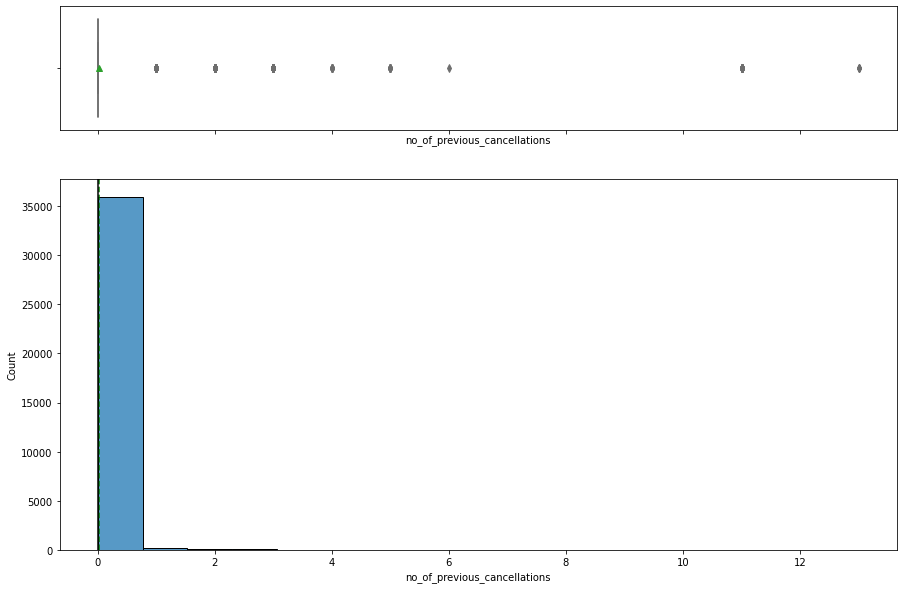

In [ ]:
# Create the boxplot and histogram for the no of previous cancellations
histogram_boxplot(data, 'no_of_previous_cancellations')

Observations:

- Most customers do not have prior cancellations.
- Some guests have only 1 prior cancellations.

#### No of Previous Bookings not Canceled

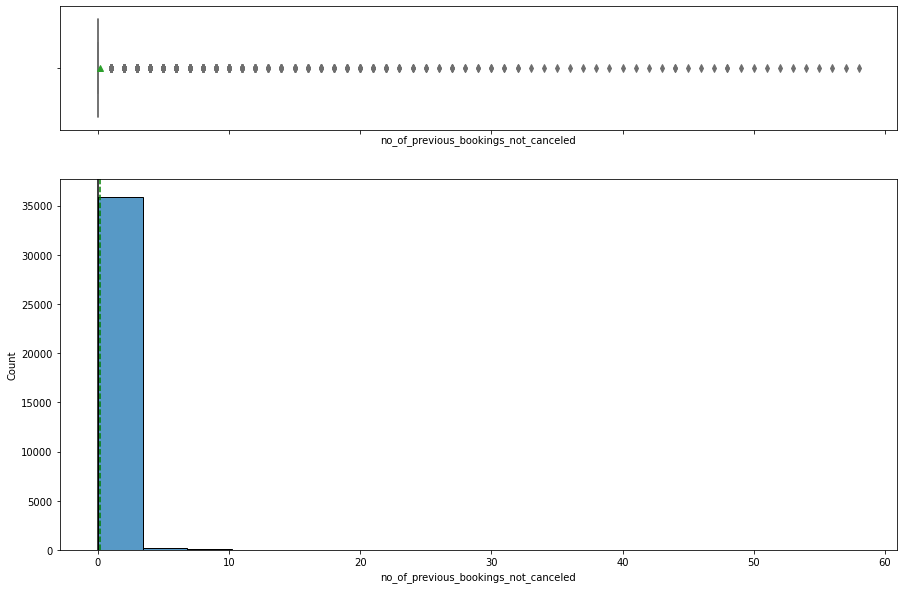

In [ ]:
# Create the boxplot and histogram for the no. of previous bookings not canceled
histogram_boxplot(data, 'no_of_previous_bookings_not_canceled')

Observations:

- Most previous bookings were not canceled.
- However there are some previous bookings that got canceled.

Write a function to display the boxplots.

In [ ]:
# Define a function to create  boxplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### No. of Adults

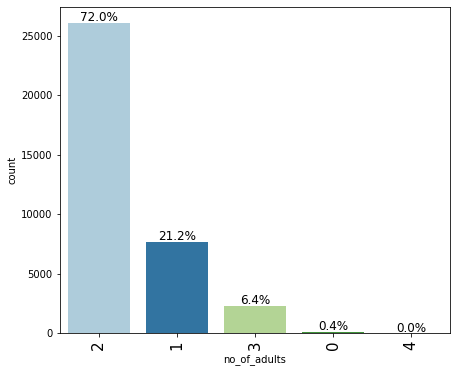

In [ ]:
# Visualise the no. of adults per booking
labeled_barplot(data, "no_of_adults", perc=True)

Observations:

- 72% bookings were for groups of 2 adults and 21.2% of bookings were for sole adult.

#### No. of Children

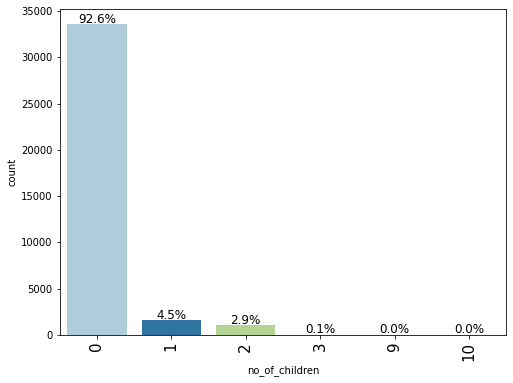

In [ ]:
# Visualise the no. of children per booking
labeled_barplot(data, "no_of_children", perc=True)

Observations:

- 92% of bookings does not have children in the group.

#### No. of Week Nights

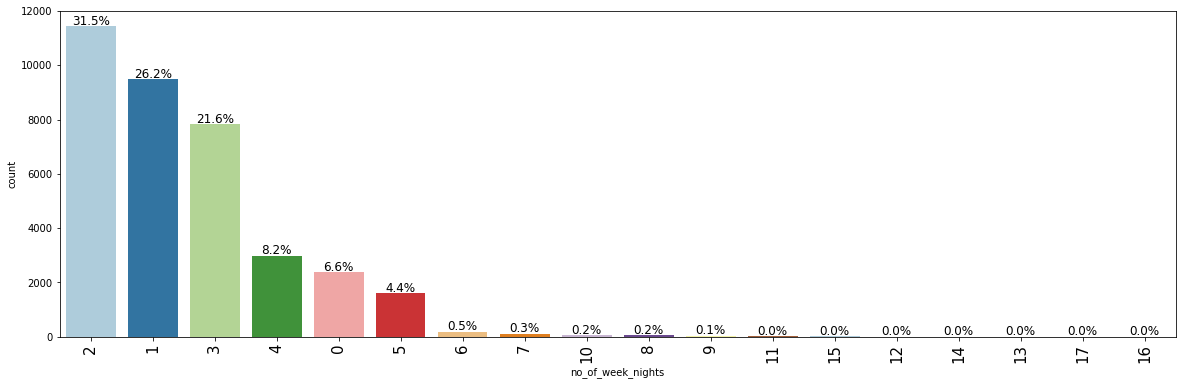

In [ ]:
# Visualise the no. of week nights (Monday to Friday) booked or stayed
labeled_barplot(data, "no_of_week_nights", perc=True)

Observations:

- 31.5% of guests booked rooms for 2 days, 26.2% of guests booked for just one day. 21.6% and 8.2% of guests booked rooms for 3 and 4 days respectively.

#### No. of Weekend Nights

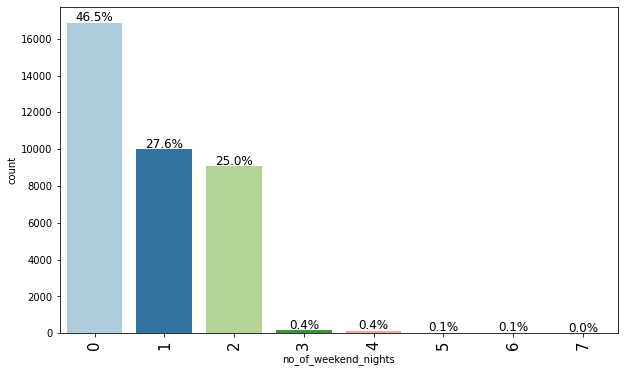

In [ ]:
# Visualise the no. of weekend nights (Saturday and Sunday) booked or stayed
labeled_barplot(data, "no_of_weekend_nights", perc=True)

Observations:

- 27.6% and 25% of guests booked or stayed for 1 and 2 weekend nights respectively.

#### Required Car Parking Space

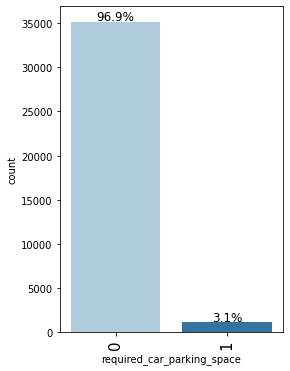

In [ ]:
# Visualisation of required parking space - Yes (1) or No (0)
labeled_barplot(data, "required_car_parking_space", perc=True)

Observations:

- 3.1% of guests requested for car parking spaces.

#### Type of Meal Plan

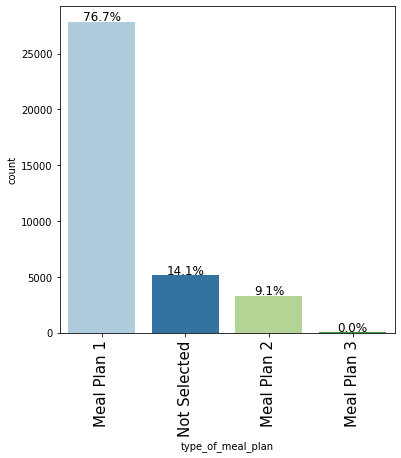

In [ ]:
# Visualise meal plan type booked
labeled_barplot(data, "type_of_meal_plan", perc=True)

Observations:

- Meal plan 1 is the most requested meal plan.

#### Room Type Reserved

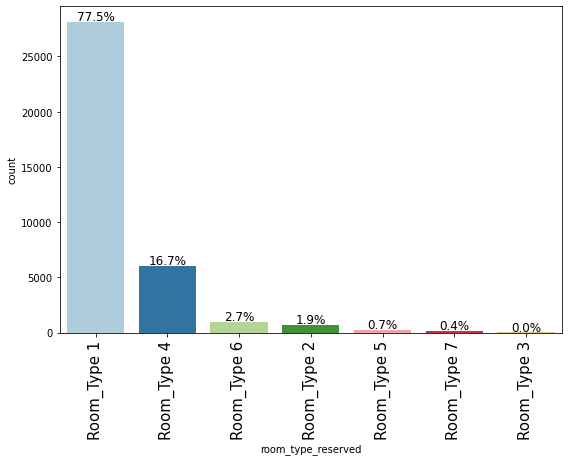

In [ ]:
# Visualise the room type reservations
labeled_barplot(data, "room_type_reserved", perc=True)

Observations:

- Room Type 1 is the most requested room.

#### Arrival Month

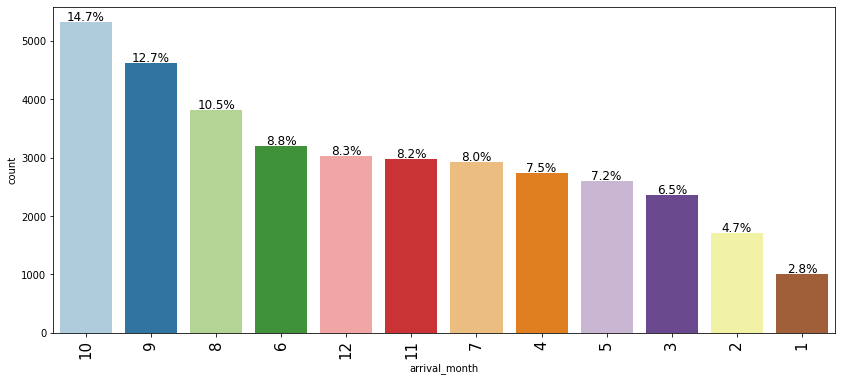

In [ ]:
# Visualisation of arrival month from January to December
labeled_barplot(data, "arrival_month", perc=True)

Observations:

- July to December are the busiest months. However, October, September and August are the busiest at 14.7%, 12.7% and 10.5% respectively.

#### Market Segment Type

In [ ]:
# Number of customers per market segment type
data[['market_segment_type']].value_counts()

market_segment_type
Online                 23214
Offline                10528
Corporate               2017
Complementary            391
Aviation                 125
dtype: int64

Visualise the Market Segment Types

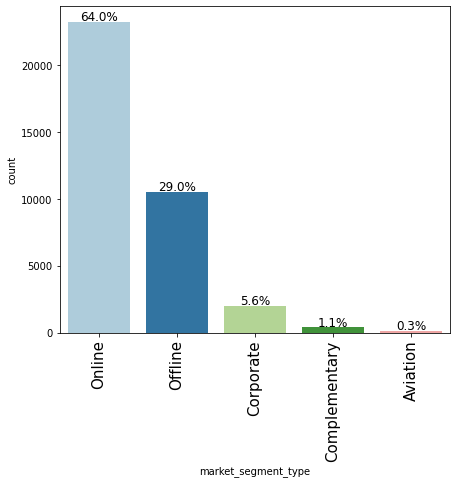

In [ ]:
# Different market segment designations
labeled_barplot(data, "market_segment_type", perc=True)

Observations:

- Most of the customers make bookings online followed by the Offline bookings. The aviation industry is the least at 125.

- The online market is the biggest segment.

#### No. of Special Requests

In [ ]:
# Quantity of special requests
data[['no_of_special_requests']].value_counts(normalize = True)

no_of_special_requests
0                         0.545196
1                         0.313522
2                         0.120303
3                         0.018608
4                         0.002150
5                         0.000221
dtype: float64

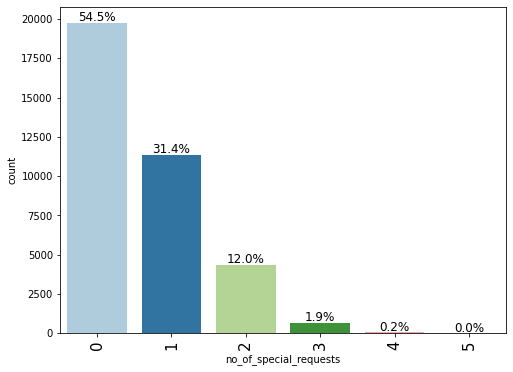

In [ ]:
# Visualise the number of special requests made
labeled_barplot(data, "no_of_special_requests", perc=True)

Observations:

- More than 50% customers do not make any special requests. Only a few customers make up to 5 different requests.

#### Booking Status

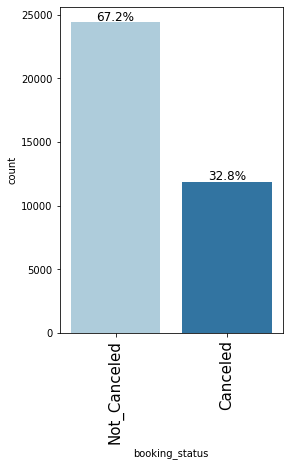

In [ ]:
# Visualise the booking status - Canceled (1) and Not Canceled (0)
labeled_barplot(data, "booking_status", perc=True)

Observations:

- About 33% of bookings are canceled.

- Therefore, the class widths is imbalanced.

In [ ]:
# Encode the booking status column
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### Bivariate Analysis

#### Correlation Plot for the numerical variable.

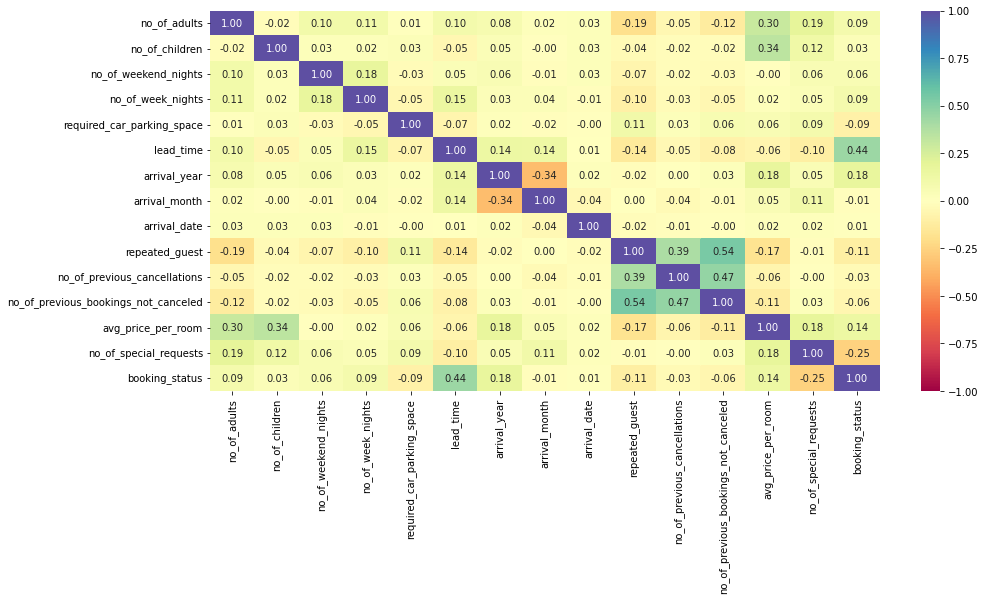

In [ ]:
# Visualise the correlation among the numerical variables in the dataset
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observations:

- There is no striking strong correlation among the features. However, there is a weak correlation between the number of repeated guests and the number of previous bookings canceled. Lead time also has a weak correlation with booking status.

- Also, is there no strong multicollinearity among the features.

### Write a function to plot the target distribution and stacked barplot

In [ ]:
# Function to plot the distributions with respect to target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# Function to plot stacked barplots
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Variation of Prices with Market Segment Type

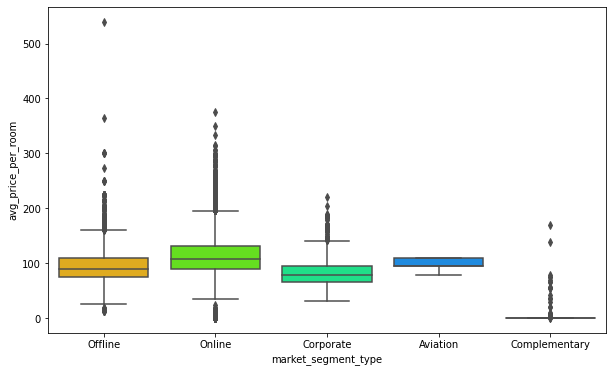

In [ ]:
# Variation of price according to market segment
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

Observations:

- Online customers tend to pay higher than all the customers of other market segments.

- Complementary market segment pays the least prices for the hotel rooms. However, Aviation pays the highest among all least prices for rooms.

### Variation of Booking Status with Market Segment Type

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


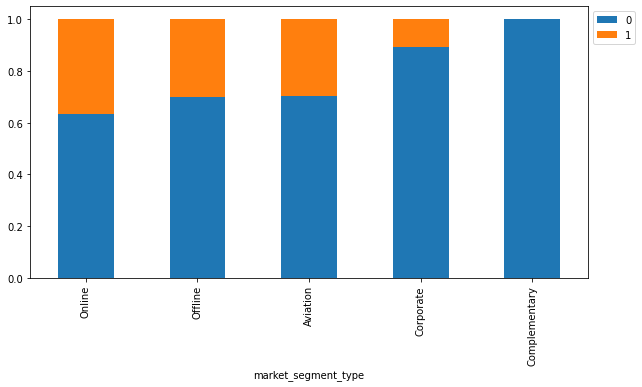

In [ ]:
# Variation of booking status according to market segment
stacked_barplot(data, "market_segment_type", "booking_status")

Observations:

- The most cancellation can be attributed to the Online market segment followed by Offline and Aviation segments in that order.

- The complementary market segment has zero cancellation.

### Variation of Prices on Booking Status

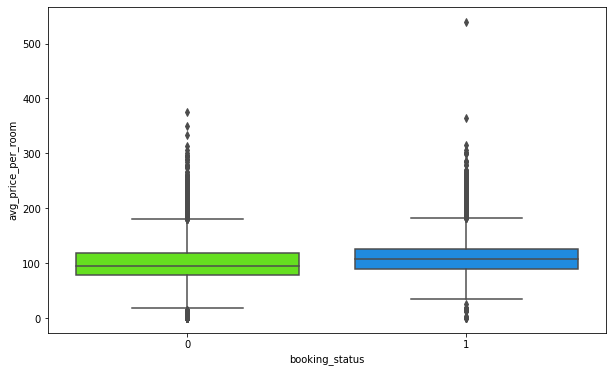

In [ ]:
# Effect of price on booking status
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="booking_status", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

Observations:

- Booking status were canceled on more higher prices than lower booking prices. 50% of canceled booking status cost more than 100 Euros while the 50% of rooms which were not canceled cost less than 100 Euros.

#### Effect Special Requests on Booking Status

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


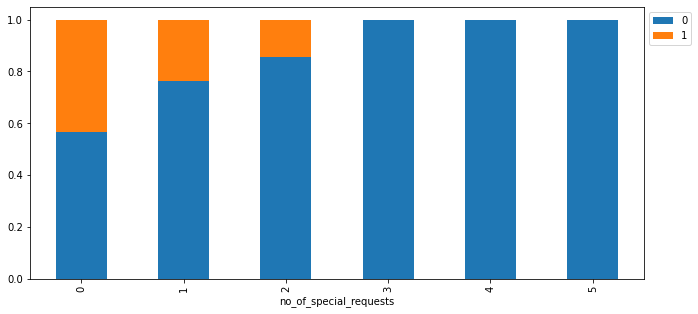

In [ ]:
# Checking if there is any effect of special requests on booking status
stacked_barplot(data, "no_of_special_requests", "booking_status")

Observations:

- A total of 8 bookings had up to 5 requests but none of them got canceled. These number of bookings might not be enough to infer a general behaviour.

- Almost 50% of bookings without any requests got canceled.

- Guests who do not have any special requests are more likely to cancel than guests who had special requests.

- Guests who had 3 ~ 5 requests did not cancel.

#### Effect of Special Requests on Prices

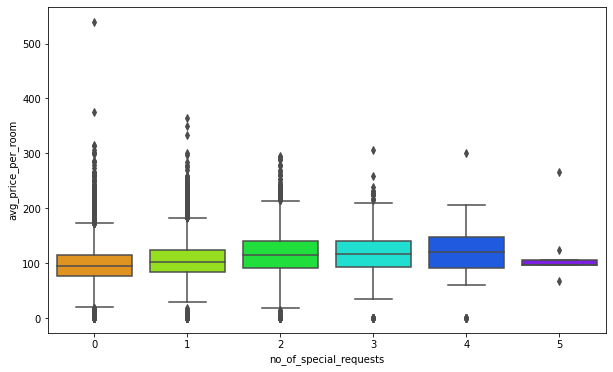

In [ ]:
# Check if special requests impact room prices
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="no_of_special_requests", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

Observations:

- Bookings with up to 4 requirements had highest median average room prices.

- However, bookings with zero and only 1 special request have some outliers.

- It appears that there's some positive correlation between the average room prices and number of requests but average room prices drop for 5 special requests.

#### Analyses of price impact on Booking Status.

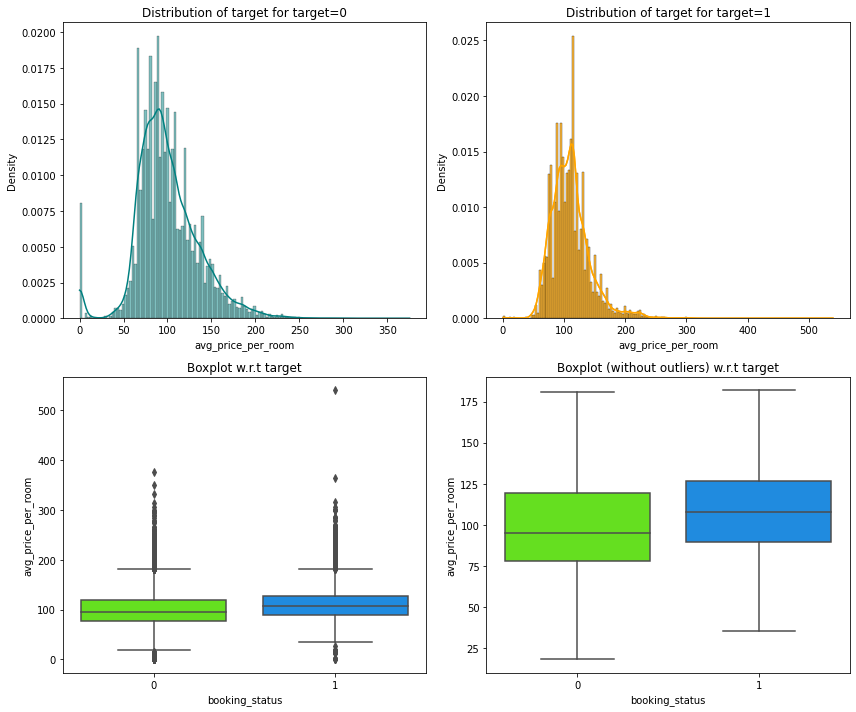

In [ ]:
# Distribution plot, boxplot and analyses of the impact of price on booking status
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

Observations:

- The distribution of average prices of rooms that got their bookings canceled and not canceled are both right-skewed.

- Bookings that got canceled cost higher than bookings that were not canceled.

- 50% of bookings that got canceled cost at least 100 Euros.

#### Analyses of impact of Lead Time on Booking Status.

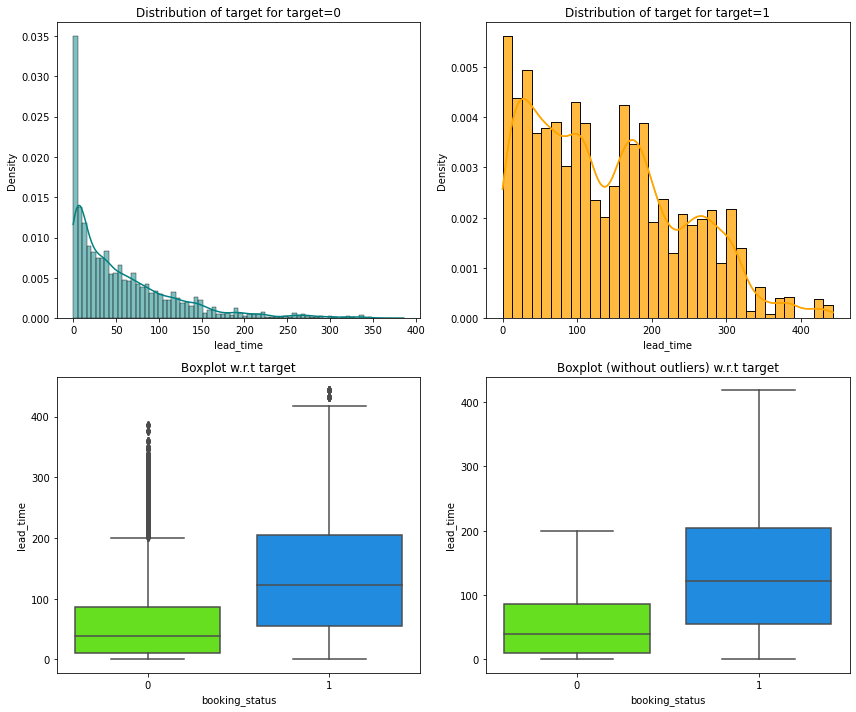

In [ ]:
# Distribution plot and analyses of the impact of lead time on booking status
distribution_plot_wrt_target(data, "lead_time", "booking_status")

Observations:

- The distribution of lead times canceled and not-canceled bookings are both right-skewed.

- Bookings that got canceled have higher lead times than bookings that were not canceled.

- 50% of bookings that got canceled have lead times greater than 100 days

- The longest booking time is greater than 400 days.


### How booking status varies wrt if guests are new or repeated.

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


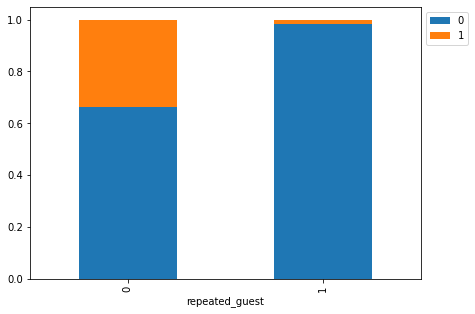

In [ ]:
# Visualise the attitude of repeat customers to booking status
stacked_barplot(data, "repeated_guest", "booking_status")

Observations:

- Out of 930 repeat guests, only 16 canceled their bookings. About 2% of repeated guests cancel their bookings. Most repeated guests do not cancel.

- Almost 50% of new guests canceled their bookings.



### Distribution of booking status according to months.

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


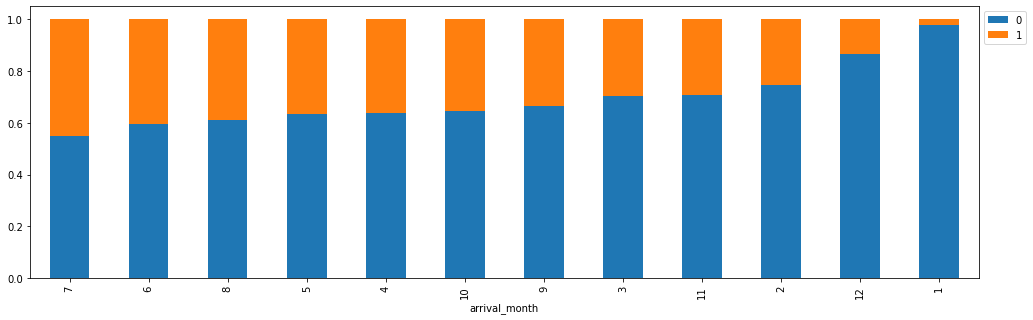

In [ ]:
# Check the distribution of booking status wrt months
stacked_barplot(data, "arrival_month", "booking_status")

Observations:

- October has the highest bookings overall and the highest cancellations.

- However, July has the highest percentage of its monthly bookings canceled followed by June and August in that order.

### Monthly price variation.

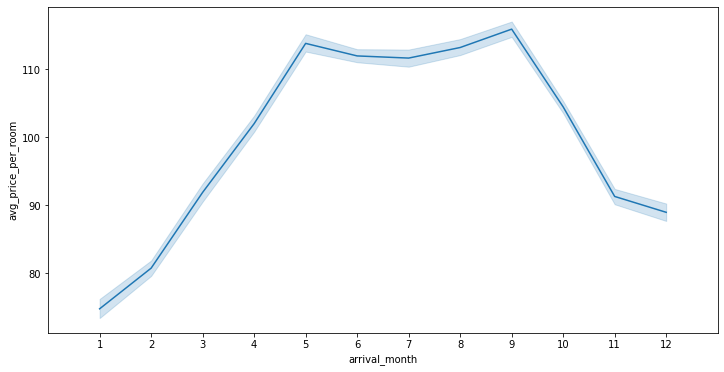

In [ ]:
# Plot the monthly variation of prices
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(
    data=data, x="arrival_month", y="avg_price_per_room", palette="gist_rainbow"
)
ax.set_xlim(0,13)
ax.set_xticks(range(1,13))

plt.show()

Observations:

- The average prices of rooms peak in May and is somewhat steady until September (during the summer) when it starts to decline.

- January has the lowest average prices per room.

 ## Feature Engineering

### Family Data

In [ ]:
# Create a subset dataframe of family_data
family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

In [ ]:
# Create a new column - 'no of family members'
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)
family_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_family_members
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0,2
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0,2
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1,2
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1,2
5,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,1,2


#### Variation of booking status on the number of family members in the booking.

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        10     5     15
11                        0     1      1
12                        1     0      1
------------------------------------------------------------------------------------------------------------------------


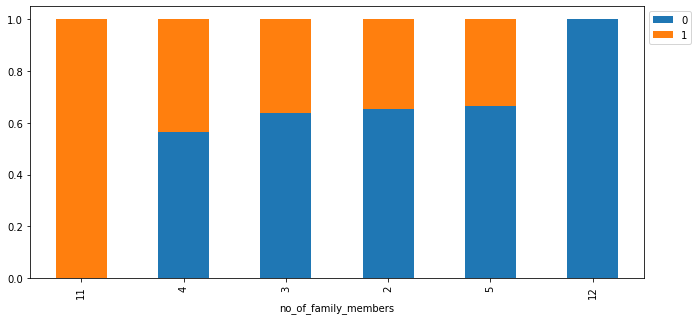

In [ ]:
# Analyse the impact of no. of family members on booking status
stacked_barplot(family_data, "no_of_family_members", "booking_status")

Observations:

- Families of 2 had the highest number of bookings as well as the highest number of cancellations.

- Families of 4 has the second highest percentage of its total that canceled.

- Only one family had a total of 11 members and they canceled.

###  Number of free bookings grouped by market segment

In [ ]:
# Determine which markets segments benefitted from free bookings or promos
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts(normalize = True)

Complementary    0.649541
Online           0.350459
Name: market_segment_type, dtype: float64

Observations:

- Complementary market segment benefitted the most from free bookings at 65% while Online market segment benefitted the remaining 35% of free bookings.

### Length of Stays

In [ ]:
# Create a subset dataframe of stay_data
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 18)

In [ ]:
# Create a new column - 'total_days'
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)
stay_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_days
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0,3
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0,5
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1,3
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1,2
6,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,0,4


#### Variation of booking status on the total days stayed in the hotel.

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

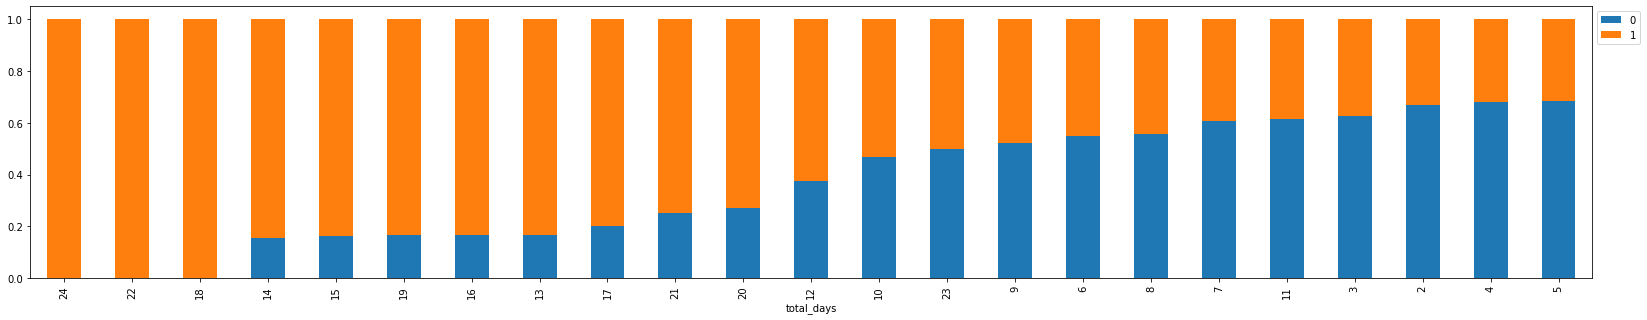

In [ ]:
# Analyse the impact of no. of total days spent in the hotel on booking status
stacked_barplot(stay_data, "total_days", "booking_status")

Observations:

- 3-day bookings had the highest total number of bookings and cancellations followed by 4 and 5 days respectively.

- 5 and 4 -day bookings got the least number of cancellation of their total percentages.

- There are only 2 bookings for 23 days and only one got canceled.

- There's only one booking for 24 days but got canceled.

### Monthly variation of booking status

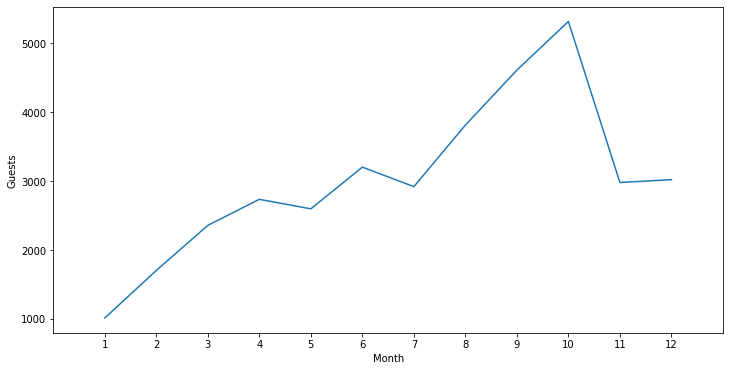

In [ ]:
# grouping the bookings by the arrival month and counting the number of bookings per month
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()
# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)
# plotting the trend over different months
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
ax1.set_xlim(0,13)
ax1.set_xticks(range(1,13))
plt.show()

Observations

- Number of bookings rose steadily from July and peaked in September but declined sharply afterwards up to November.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

- There are no missing values to be treated
- Feature engineering has been conducted to determine:
    - Effect of number of family members on booking status
    - Effect of length of stays on booking status
    - Monthly variation of booking status

#### Outlier Detection and Treatment

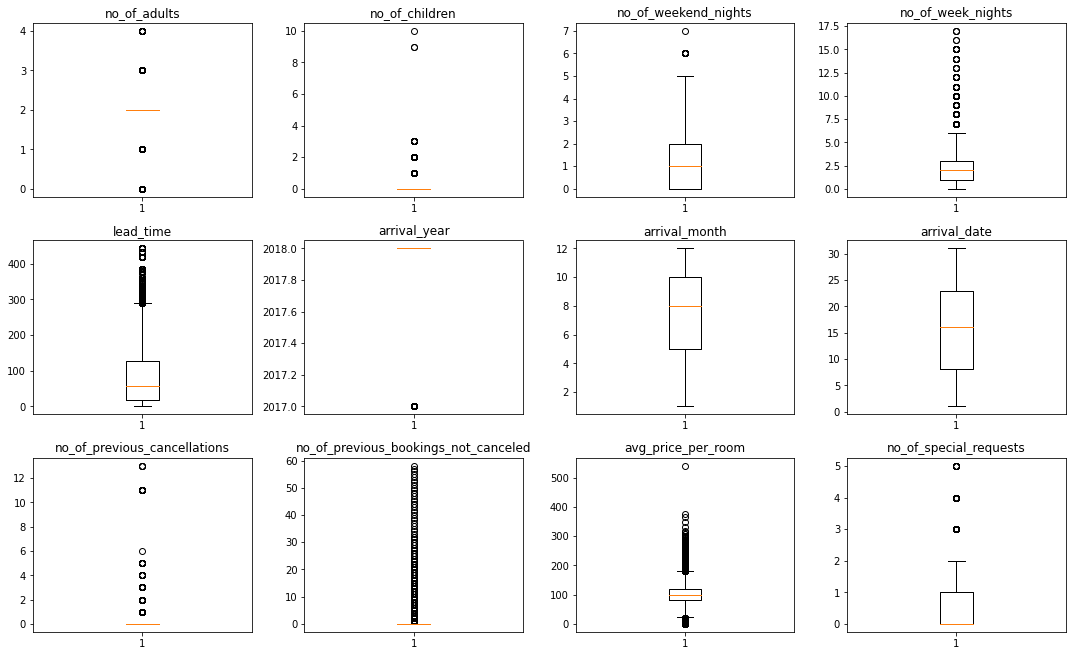

In [ ]:
# outlier detection using boxplot
cols_list1 = data.select_dtypes(include=np.number).columns.tolist()
# dropping the binary columns
for i in cols_list1:
  if i == "required_car_parking_space":
    cols_list1.remove(i)
  elif i == "repeated_guest":
    cols_list1.remove(i)
  elif i == "booking_status":
    cols_list1.remove(i)


plt.figure(figsize=(15, 12))

# write a loop to create boxplots for the numerical columns
for i, variable in enumerate(cols_list1):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations

- Only arrival month and arrival date does not have outliers. All other features have outliers.

- Only average price per room and lead time will be treated for outliers because the average price room has an isolated price at 540 Euros and although not possible it seems uncommon for hotel rooms to be booked for up to 18 months in advance therefore, lead times will also be treated for lead times greater 350 days.

### Outlier Treatment - Average price per room

In [ ]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [ ]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

### Outlier Treatment - lead time




In [ ]:
# Calculating the 25th quantile
Q1 = data["lead_time"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["lead_time"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
_Upper_Whisker = Q3 + 1.5 * IQR
_Upper_Whisker

289.5

In [ ]:
# assigning the outliers the value of upper whisker
data.loc[data["lead_time"] >= 350, "lead_time"] = _Upper_Whisker

### Display the new Boxplots after oulier treatment

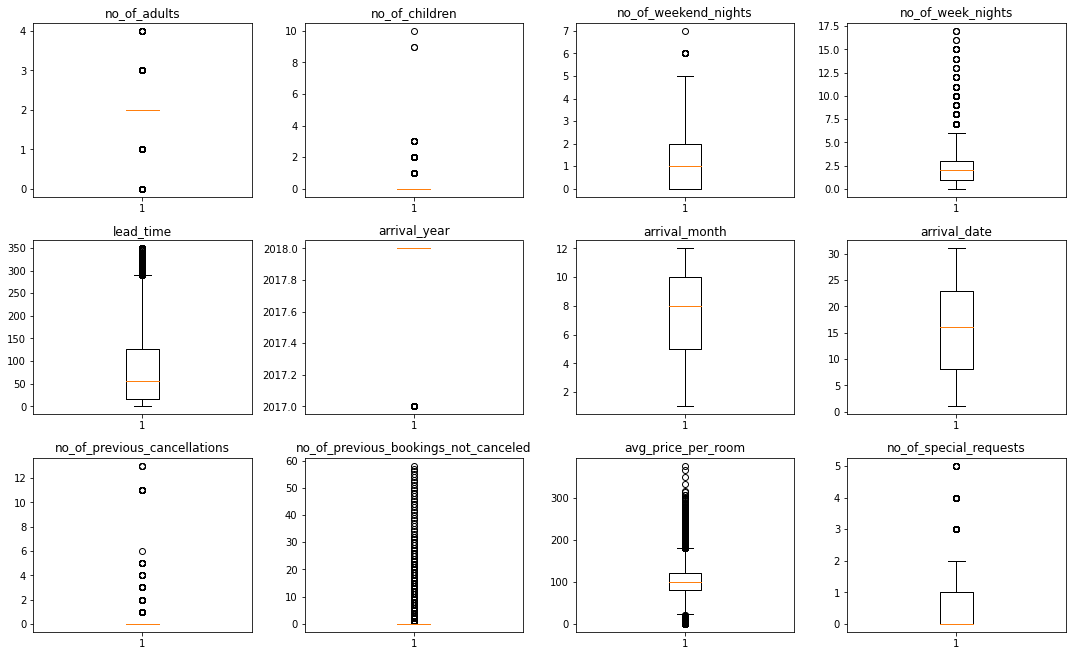

In [ ]:
plt.figure(figsize=(15, 12))

# write a loop to create boxplots for the numerical columns
for i, variable in enumerate(cols_list1):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observation:

- Lead time and average price per room have been treated.

### EDA (Post-Outlier Treatment)

- It is a good idea to explore the data once again after manipulating it.
- Only the average price per room and lead time which were treated will re-examined.

#### Correlation plot (Post Outlier Treatment)

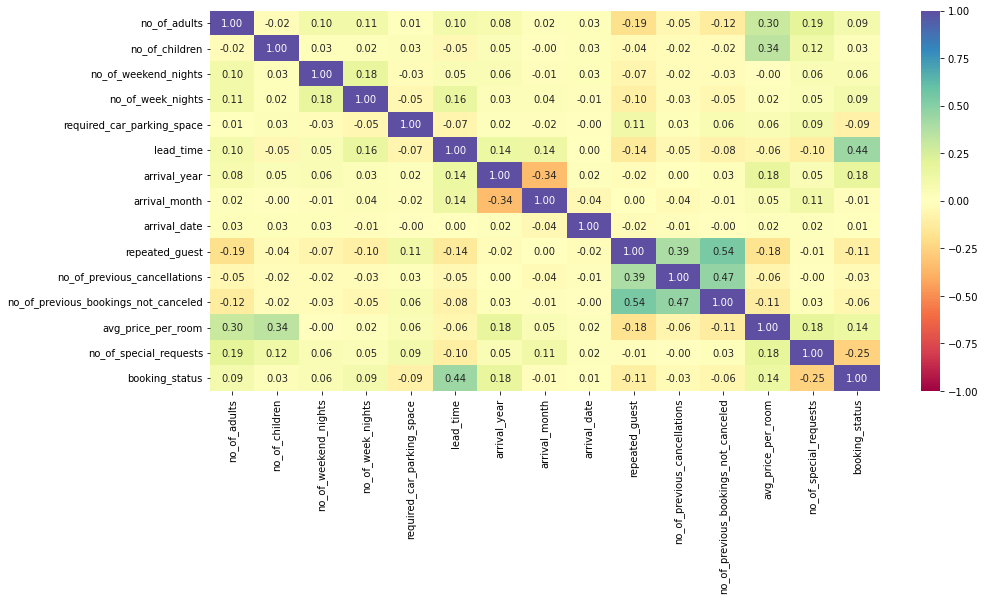

In [ ]:
# Visualise the correlation among the numerical variables in the dataset
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observation:

- There is no change in the correlation plot.

#### Average Price Per Room (Post Outlier Treatment)

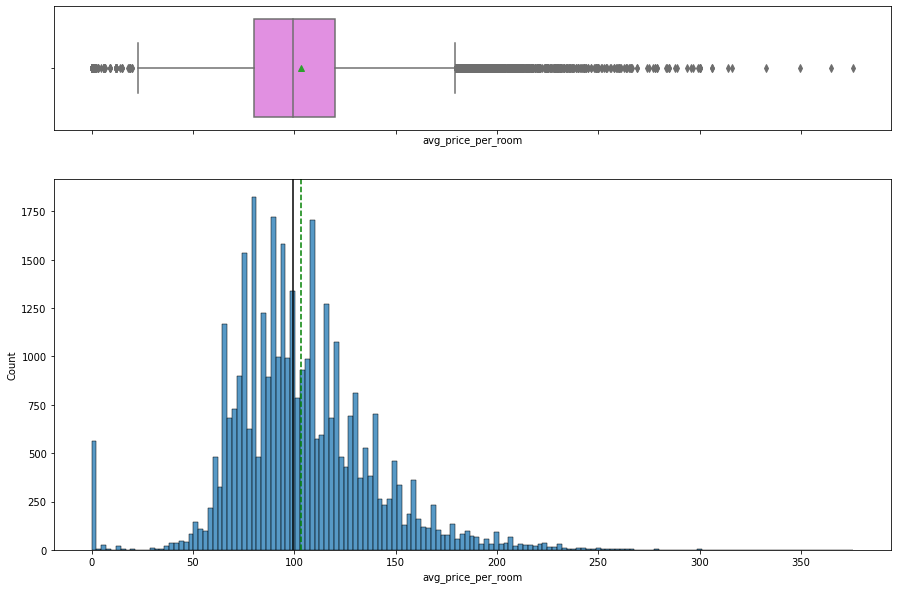

In [ ]:
# Create the boxplot and histogram for the average price per room
histogram_boxplot(data, "avg_price_per_room")

Observation:

- There is no visible change in the distribution because just one outlier entry was treated.

#### Variation of Price according to market segment (Post Outlier Treatment)

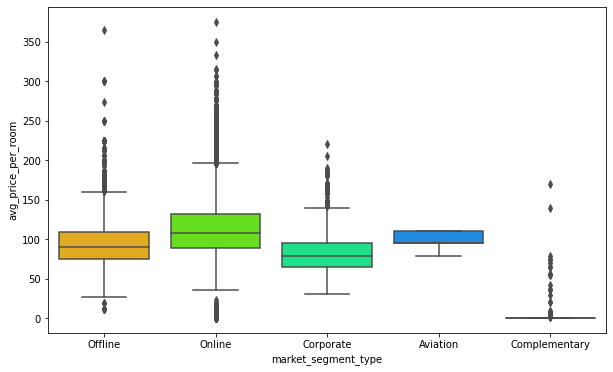

In [ ]:
# Variation of price according to market segment
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

Observation:

- The outlier belonging to the Offline market segment has been removed.

#### Price Variation on market segment (Post Outlier Treatment)

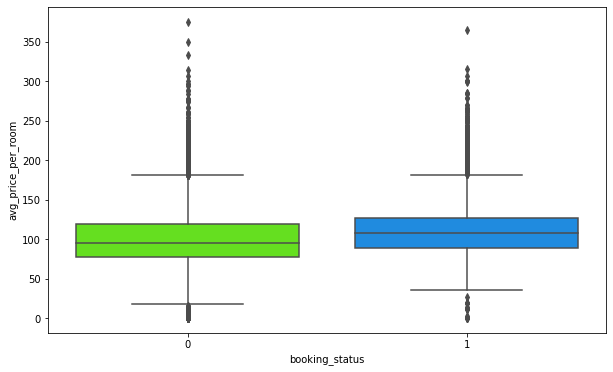

In [ ]:
# Variation of booking status according to price
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="booking_status", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

Observation:

- The boxplots still remain the same.

#### Do special requests impact room prices?

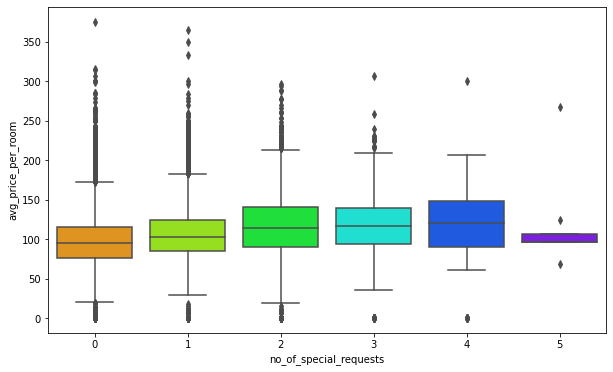

In [ ]:
# Check if special requests impact room prices
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="no_of_special_requests", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

Observation

- The boxplots still remain the same.

#### Analyses of price impact on Booking Status (Post Outlier Treatment)

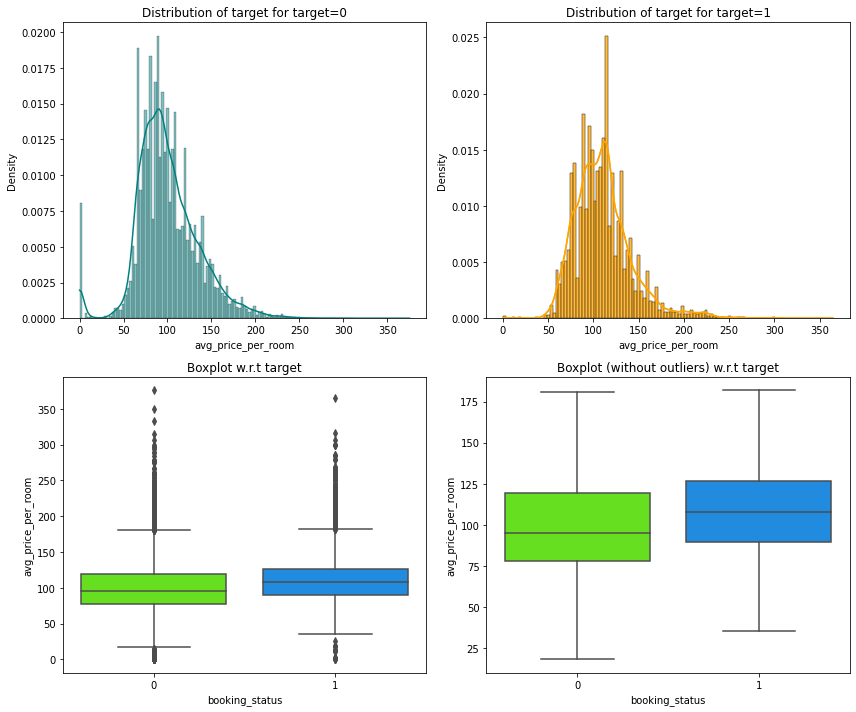

In [ ]:
# Distribution plot, boxplot and analyses of the impact of price on booking status
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

Observation

- There is no difference in plots. Therefore, the data remains the same.

#### Monthly Price Variation (Post Outlier Treatment)

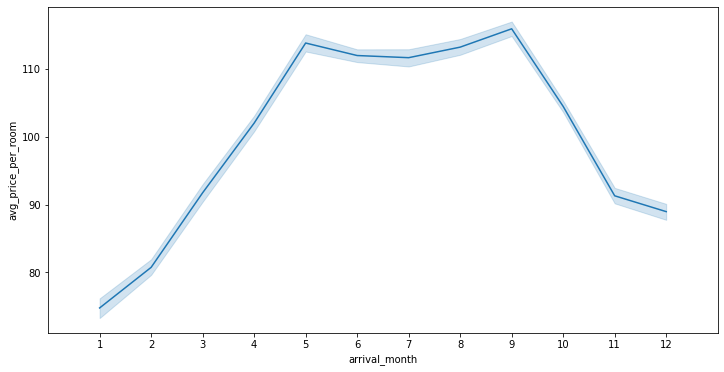

In [ ]:
# Plot the monthly variation of prices
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(
    data=data, x="arrival_month", y="avg_price_per_room", palette="gist_rainbow"
)
ax.set_xlim(0,13)
ax.set_xticks(range(1,13))

plt.show()

Observation

- The lineplot still remains the same.

#### Lead Time (Post Outlier Treatment)

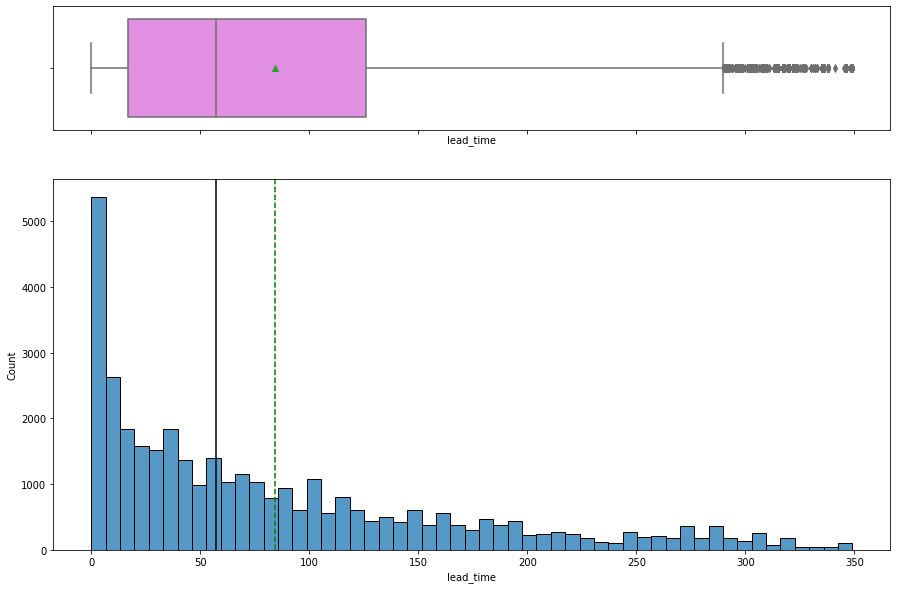

In [ ]:
# Create the boxplot and histogram for the lead time
histogram_boxplot(data, "lead_time")

Observation

- The mean has now reduced.

#### Analyses of the impact of Lead time on Booking Status (Post Outlier Treatment)

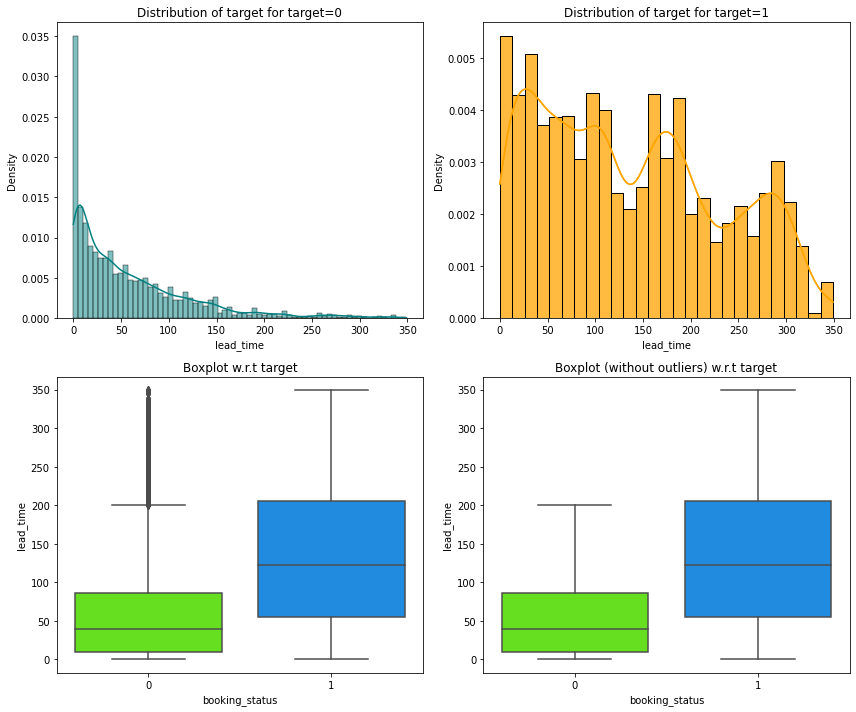

In [ ]:
# Distribution plot and analyses of the impact of price on booking status
distribution_plot_wrt_target(data, "lead_time", "booking_status")

Observation

- The highest lead time is now 350 days.

#### Data Preprocessing (Logistic Regression)


- To build a model that can predict which bookings get canceled:
  - First, encode the categorical features.
  - Then, split the data into train and test sets.

In [ ]:
# defining X and Y variables
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64


### Fitting the Logistic Regression

#### Logistic Regression Model (Default)

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

# let's print the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 19 Nov 2022   Pseudo R-squ.:                  0.3286
Time:                        13:37:55   Log-Likelihood:                -10803.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -967.9925    120.817     -8.012      0.000   -1204.789    -731.196
no_of_adults                             0.1122      

**Observations**

- Negative values of the coefficients indicate that as the probability of room bookings being canceled increases the probability of the corresponding feature decreases.

- Otherwise, positive values of the coefficients indicate that as the probability of room booking being canceled increases the probability of the corresponding feature increase.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

### Model Performance Evaluation

**Model can make wrong predictions as**:

1. Predicting that the booking status will not be canceled but is canceled.

2. Predicting that booking status is canceled whereas it not canceled.

**Which case is more important?**

* Both the cases are important as:

  * If INN Hotels predicts that a booking status is not canceled but is canceled INN Hotels loses revenue, potential customers, company reputation and may lose customers to other competitors or, in the worst case, eventually go out of business.

  * If INN Hotels predicts that a booking will be canceled where as it is not canceled, INN Hotels may be expending resources and time to convert the wrong potentials while ignoring bookings which may potentially get canceled.


**How to reduce this loss?**

* We need to reduce both False Negatives and False Positives

* `f1_score` should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly
  * fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

#### Creating the functions to determine the accuracy, F1 score, recall, precision and confusion matrices.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Checking the Performance of the default model for the train and test sets.

#### Performance on train set

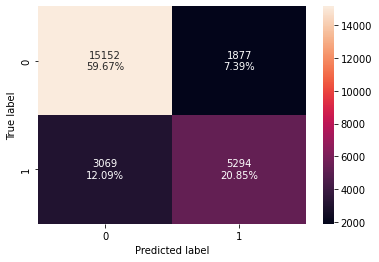

In [ ]:
# Determine the confusion matrix of the model
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
# Check the performance of the training model
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805214,0.633026,0.738251,0.681602


#### Performance on test set

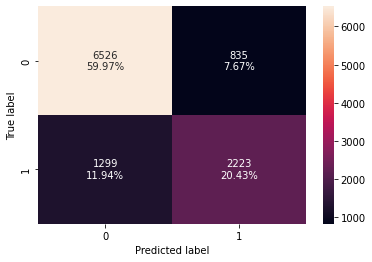

In [ ]:
# Determine the confusion matrix of the model
confusion_matrix_statsmodels(lg, X_test, y_test)

In [ ]:
# Check the performance of the training model
print("Test performance:")
model_performance_classification_statsmodels(lg, X_test, y_test)

Test performance:


,Accuracy,Recall,Precision,F1
0,0.803914,0.631175,0.726946,0.675684


**Observations**

- The f1_scores of the model for the train and test sets are satisfactory at ~0.68, however, efforts will be made to maximise them further.

- The model will checked for multicollinearity among the features and removed accordingly.

* After removing the multicollinearity, the p-values will be checked and the probability values greater than 0.05 will be removed.

### Checking Assumptions - Multicollinearity





- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is **no multicollinearity present in the data**.

* **Variance  Inflation Factor (VIF)** measures by how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.

* **General Rule of thumb that will be used**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is greater than 5 then treatment is required after considering the effect on the model due to dropping the feature.
* The purpose of the analysis should dictate which threshold to use

#### Calculate the VIF for all the features

In [ ]:
# calculating VIF for each feature
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   3.939571e+07
no_of_adults                            1.348929e+00
no_of_children                          1.978614e+00
no_of_weekend_nights                    1.069475e+00
no_of_week_nights                       1.098239e+00
required_car_parking_space              1.039976e+00
lead_time                               1.392126e+00
arrival_year                            1.428206e+00
arrival_month                           1.274715e+00
arrival_date                            1.006558e+00
repeated_guest                          1.783814e+00
no_of_previous_cancellations            1.395682e+00
no_of_previous_bookings_not_canceled    1.651969e+00
avg_price_per_room                      2.062573e+00
no_of_special_requests                  1.247651e+00
type_of_meal_plan_Meal Plan 2           1.266483e+00
type_of_meal_plan_Meal Plan 3           1.025217e+00
type_of_meal_plan_Not Selected          1.272360e+00
room_type_r

Observations:

* `market_segment_type_Online` and `market_segment_type_Offline` exhibit high multicollinearity

* `market_segment_type_Online` will be dropped and the VIF will then be computed again.

#### Dropping the "market_segment_type_Online" column since it has the highest VIF of all the features.

In [ ]:
# dropping the 'market segment type online' column and print the series vif
X_train1 = X_train.drop("market_segment_type_Online", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                   3.931806e+07
no_of_adults                            1.332639e+00
no_of_children                          1.977741e+00
no_of_weekend_nights                    1.069043e+00
no_of_week_nights                       1.097658e+00
required_car_parking_space              1.039842e+00
lead_time                               1.387661e+00
arrival_year                            1.425723e+00
arrival_month                           1.273649e+00
arrival_date                            1.006544e+00
repeated_guest                          1.780509e+00
no_of_previous_cancellations            1.395439e+00
no_of_previous_bookings_not_canceled    1.651730e+00
avg_price_per_room                      2.061723e+00
no_of_special_requests                  1.242763e+00
type_of_meal_plan_Meal Plan 2           1.266141e+00
type_of_meal_plan_Meal Plan 3           1.025217e+00
type_of_meal_plan_Not Selected          1.270543e+00
room_type_r

Observation:

* Dropping market_segment_type_Online clears the multicollinearity for market segmentation.

#### Fitting the new model without multicollinearity.

In [ ]:
# fitting logistic regression model again and check the performance
logit2 = sm.Logit(y_train, X_train1.astype(float))
lg2 = logit2.fit(disp=False)


print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805135,0.633026,0.738045,0.681514


* There is no significant change in the model performance.

**Observations:**
1. Although dropping the market_segment_type_Online the performance of the model is not improved.
2. Model improvement is still required.
3. Therefore, the insignificant features (having p-values > 0.05) will be removed and model performance evaluation will be confirmed again.

#### Check the summary of model without multicollinearity - lg2

In [ ]:
# Print the new logistic regression summary
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sat, 19 Nov 2022   Pseudo R-squ.:                  0.3286
Time:                        13:38:00   Log-Likelihood:                -10805.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -977.0389    120.653     -8.098      0.000   -1213.514    -740.564
no_of_adults                             0.1044      

### Checking Assumptions - Removing high p-value variables

* Some features present in the data exhibit high p-values for few dummy variables and since some of these variables are extraneous in terms of the information they provide, the affected features will not be dropped serially.

* To treat the high p-values, a function will be defined to remove p-values > 0.05:
  - A model will be built to check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - The steps above will be repeated till there are no columns with p-value > 0.05.



In [ ]:
# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


#### Make a new dataframes of the new train and test sets with the significant features.

In [ ]:
# make a new DataFrame for train and test sets with variables having p-value less than 0.05
X_train2 = X_train1[selected_features]
X_test2 = X_test[selected_features]

#### Fit the new model with the significant features and print the summary - lg3

In [ ]:
# fitting logistic regression model again and check the performance
logit3 = sm.Logit(y_train, X_train2.astype(float))
lg3 = logit3.fit(disp=False)

# Print the new logistic regression summary
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 19 Nov 2022   Pseudo R-squ.:                  0.3277
Time:                        13:38:03   Log-Likelihood:                -10819.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -960.5958    120.465     -7.974      0.000   -1196.703    -724.489
no_of_adults                       0.1070      0.037      2.868      0.

**The final model (lg3) to be adopted having all the categorical features in X_train2 with p-values for all features <= 0.05.**

#### Interpretation of Coefficients

* Coefficients of lead_time, no_of_previous_cancellations, and avg_price_per_room are positive. Therefore an increase in these will lead to increase in the likehood of booking status getting canceled.


* Also, the coefficients of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights are positive. Therefore an increase in these will lead to increase in the likehood of booking status getting canceled.

* The coefficients of required_car_parking_space, repeated_guest, no_of_special_requests and levels of room_type_reserved are negative. Therefore an increase in these will lead to decrease in the likehood of booking status getting canceled

**Converting coefficients to odds**

* Taking the exponential of the coefficients, the coefficients ($\beta$s) of the logistic regression model is converted from $log(odds)$ to odds
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [ ]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.0,1.112903,1.161900,1.117828,1.038151,0.201853,1.016068,1.607354,0.959795,0.074759,1.242508,1.019338,0.229985,1.226899,1.331996,0.698174,0.753192,0.475823,0.382954,0.241136,0.455517,0.167762
Change_odd%,-100.0,11.290339,16.189963,11.782762,3.815109,-79.814678,1.606753,60.735415,-4.020469,-92.524146,24.250799,1.933772,-77.001496,22.689913,33.199619,-30.182594,-24.680838,-52.417673,-61.704644,-75.886410,-54.448298,-83.223846


**Coefficient interpretations after odd conversion**

* `lead_time`: Holding all other features constant a 1 unit change in Lead time will increase the odds of booking cancellations by ~1.02 times or a ~1.62% increase in odds of having the booking canceled.
* `no_previous_cancellations`: Holding all other features constant, a 1 unit change in number of previous cancellation will increase the odds of booking cancellations by ~1.24 times or a ~24.3% increase in odds of having the booking canceled.
* `avg_price_per_room`: Holding all other features constant, a 1 unit change in the average price per room will increase the odds of booking cancellations by ~1.02 times or a ~1.9% increase in odds of having the booking canceled.
* `no_of_children`:Holding all other features constant, a 1 unit change in the number of children will increase the odds of booking cancellations by ~1.11 times or a ~16.19% increase in odds of having the booking canceled.

* `no_of_special_requests`:Holding all other features constant, a 1 unit change in number of special requests by customers decreases the odds of booking cancellations by ~0.23 times or a ~77% decrease in odds of having the booking canceled.
* `room_type_reserved`:The odds of bookings for which room type 7 is reserved getting canceled is ~0.24 times less than bookings having room type 1 reserved or ~24.3% fewer odds of having its booking canceled..

* `repeated_guests`:The odds of bookings made by returning guests getting canceled is ~0.07 times less than bookings of new guests or ~92.5% fewer odds of having its booking canceled.


#### Checking the performance of the model with significant features (Logistic Regression)

#### Performance on train set

In [ ]:
# Print the train performance regression model - lg3
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg3, X_train2, y_train)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805647,0.634581,0.738519,0.682616


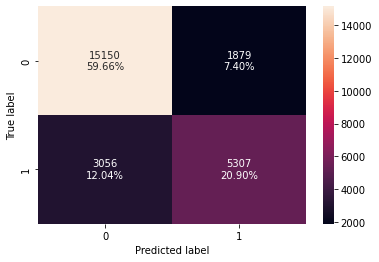

In [ ]:
# creating confusion matrix for the regression model
confusion_matrix_statsmodels(lg3, X_train2, y_train)

#### Performance on test set

In [ ]:
# Print the test performance regression model - lg3

log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.804741,0.632879,0.728193,0.677199


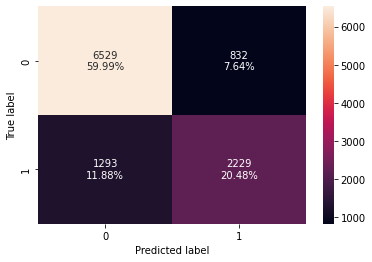

In [ ]:
# creating confusion matrix for the regression model - lg3 test set
confusion_matrix_statsmodels(lg3, X_test2, y_test)

- The f1_scores of scores of the model at ~0.683 and ~0.677 on the train and test sets respectively needs to be improved
- However, the f1_scores are comparable.
- Using the ROC-AUC, the model will be improved.

### Model Performance Improvement

* To see if the f1_score can be improved further, the model threshold will be changed by:
* First, use the ROC curve, compute the area under the ROC curve (ROC-AUC)and determine the optimal threshold.
* Next, since f1_score is the required metric, the Precision-Recall curve will be used to determine the balance between precision and recall.

### ROC - AUC


#### ROC-AUC on the training set

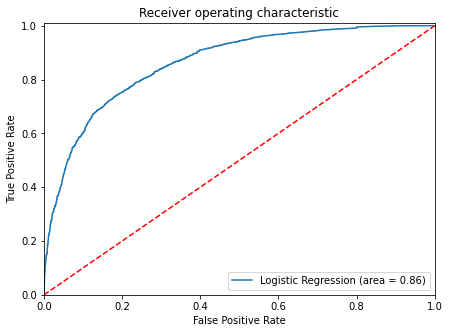

In [ ]:
#ROC-AUC on the train set
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3648885208078937


#### Performance on train set

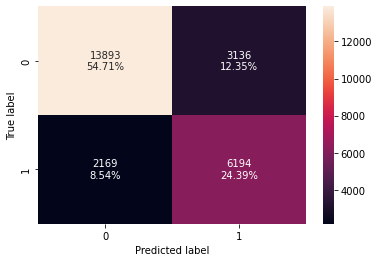

In [ ]:
# creating confusion matrix with the calculated optimal threshold ROC-AUC on the train set
confusion_matrix_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [ ]:
# Check the performance of train set with calculated ROC-AUC
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.791076,0.740643,0.66388,0.700164


* F1_score and Recall of model have increased, however the other metrics have reduced.




#### ROC-AUC on the test set

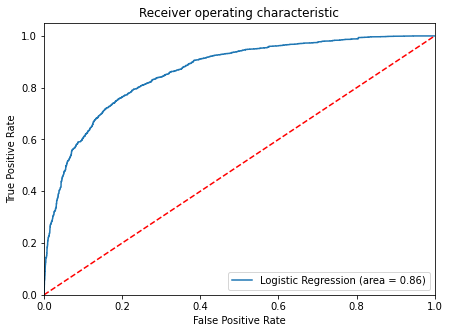

In [ ]:
#ROC-AUC on the test set
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Observations:

* The optimal threshold is 0.36 according to the AUC of the ROC.

* However, the precision-recall curve will be used to determine a more optimal threshold.

#### Performance on test set

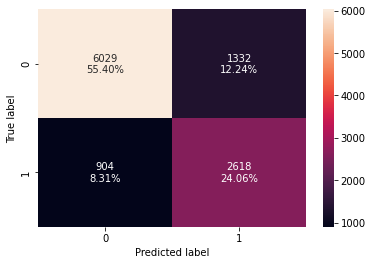

In [ ]:
# creating confusion matrix with the calculated optimal threshold ROC-AUC on the test set
confusion_matrix_statsmodels(lg3, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# Check the performance of test set with calculated ROC-AUC
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.794542,0.743328,0.662785,0.700749


Observations:

* The model performs slightly better on the test set than on the train set.

* The f1_scores for the model are ~0.700 and 0.701 for train and test sets respectively.

* The f1_scores of the model are comparable so are the other metrics of the model.

* However, attempts will still be made to improve the model using the precision-recall curve.

#### Determine the Precision-Recall Optimal Threshold

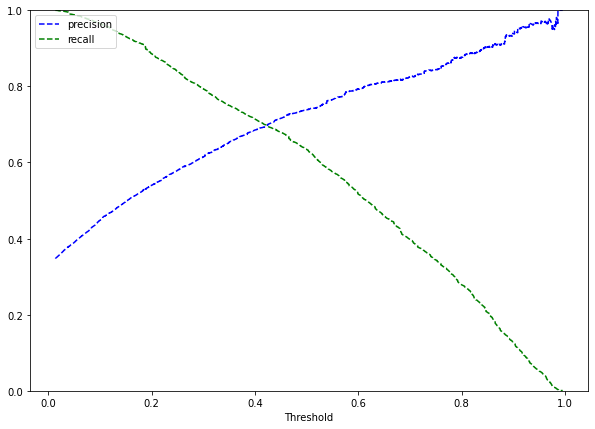

In [ ]:
# Using the precision-recall to determine the better threshold
y_scores = lg3.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* The precision-recall balance appears to be at 0.42 threshold.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

**Checking model performance on training set using the 0.42 threshold balance**

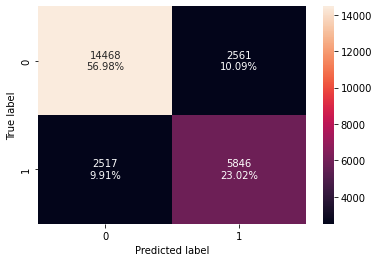

In [ ]:
# creating confusion matrix for the train set with optimal threshold, 0.42
confusion_matrix_statsmodels(lg3, X_train2, y_train, threshold=optimal_threshold_curve)

In [ ]:
# Check the performance of train set with the optimal threshold, 0.42
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.800016,0.699031,0.695373,0.697197


**Checking model performance on test set using the 0.42 threshold balance**

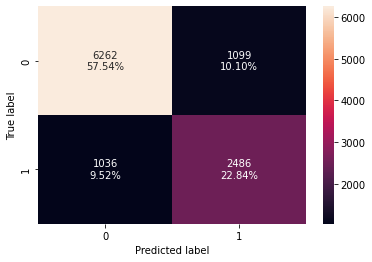

In [ ]:
# creating confusion matrix for the test set with optimal threshold, 0.42
confusion_matrix_statsmodels(lg3, X_test2, y_test, threshold=optimal_threshold_curve)

In [ ]:
# Check the performance of test set with the optimal threshold, 0.42
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.803822,0.705849,0.693445,0.699592


* The f1_scores have dropped only slightly.
* There is no improvement on the model after using the optimal threshold.

#### Create a DataFrame of all the Logistic Regression Models for the Train and Test Sets

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default (0.5) Threshold",
    "Logistic Regression-0.36 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default (0.5) Threshold,Logistic Regression-0.36 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.805647,0.791076,0.800016
Recall,0.634581,0.740643,0.699031
Precision,0.738519,0.663880,0.695373
F1,0.682616,0.700164,0.697197


In [ ]:
# training performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default (0.5) Threshold",
    "Logistic Regression-0.36 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Logistic Regression-default (0.5) Threshold,Logistic Regression-0.36 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.804741,0.794542,0.803822
Recall,0.632879,0.743328,0.705849
Precision,0.728193,0.662785,0.693445
F1,0.677199,0.700749,0.699592


- Almost all the three models are performing well on both training and test data without the problem of overfitting.
- The model with a  threshold - 0.36 is giving the best F1 score and it also has the highest Recall score. Therefore it can be selected as the final logistic regression model.



### Decision Tree

#### Data Preparation for modeling (Decision Tree)

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

#### Assign the X and Y variables

In [ ]:
# defining X and Y variables
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64


* As seen from earlier from the barplot, about 67% of observations belongs to class 0 (Not Canceled) and about 33% of observations belongs to class 1 (Canceled), and this is consistent across the train and test sets.

* The ratio of positives to negatives is approximately 3:7, so if the model marks each sample as negative, then also we'll get ~70% accuracy, hence accuracy is not a good metric to evaluate here.


#### To proceed, functions to calculate different metrics and confusion matrix are created.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Building Decision Tree Model

**Model can make wrong predictions as**:

1. Predicting that the booking status will not be canceled but is canceled.

2. Predicting that booking status is canceled whereas it not canceled.

**Which case is more important?**

* Both the cases are important as:

  * If INN Hotels predicts that a booking status is not canceled but is canceled INN Hotels loses revenue, potential customers, company reputation and may lose customers to other competitors or, in the worst case, eventually go out of business.

  * If INN Hotels predicts that a booking will be canceled where as it is not canceled, INN Hotels may be expending resources and time to convert the wrong potentials while ignoring bookings which may potentially get canceled.


**How to reduce this loss?**

* We need to reduce both False Negatives and False Positives

* `f1_score` should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly
  * fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

#### Decision Tree (Without Class Weight)

In [ ]:
# Build a default decision tree
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Confusion Matrix and Performance Test for the Train and Test sets (Without Class Weights)

#### Performance on the train set

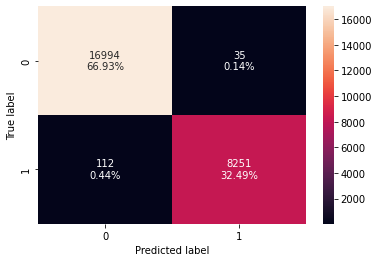

In [ ]:
# creating confusion matrix for the train set for default decision tree
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
# Check the performance of the train set for default decision tree
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,0.994211,0.986608,0.995776,0.991171


#### Performance on test set

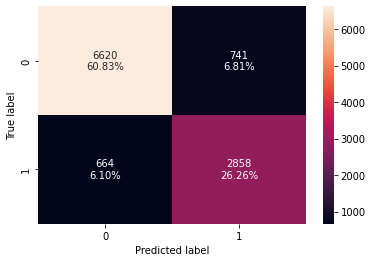

In [ ]:
# creating confusion matrix for the test set for default decision tree
confusion_matrix_sklearn(model0, X_test, y_test)

In [ ]:
# Check the performance of the test set for default decision tree
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.8709,0.811471,0.794109,0.802696


Observations:

* The f1_scores of the default model are ~0.99 and 0.803 for the train and test sets respectively.

* These are good f1_scores however there is a wide gap between the 2 f1_scores stated above suggesting overfitting.

* Therefore, the model will be pruned to determine the best fit model.

#### Decision Tree (With Class Weights)

In [ ]:
# Build a decision tree balancing the class weights
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

#### Confusion Matrix and Performance Test for the Train and Test sets (With Class Weights)

#### Performance on train set

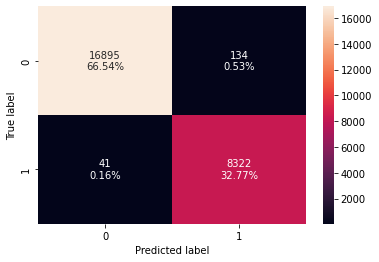

In [ ]:
# create the confusion matrix for the train set for decision tree with balanced class weights
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
# Check the performance of the train set for decision tree with balanced class weights
decision_tree_perf_train_balanced = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train_balanced

,Accuracy,Recall,Precision,F1
0,0.993108,0.995097,0.984153,0.989595


#### Performance on test set

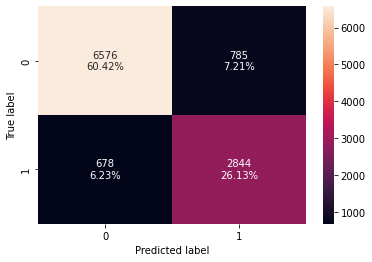

In [ ]:
# create the confusion matrix for the test set for decision tree with balanced class weights
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
# Check the performance of the train set for decision tree with balanced class weights
decision_tree_perf_test_balanced = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test_balanced

,Accuracy,Recall,Precision,F1
0,0.86557,0.807496,0.783687,0.795413


Observations:

* The f1_scores of the model using balanced class weights are ~0.99 and ~0.80 for the train and test sets respectively.

* These are good f1_scores however there is a wide gap between the 2 f1_scores stated above suggesting overfitting.

* Therefore, the model will be pruned to determine the best fit model.

### Decision Tree (Pre-pruning)

#### Using the Gridsearch for hyperparameter tuning of the model.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=75,
                       min_samples_split=10, random_state=1)

#### Confusion Matrix and Performance Test for the Train and Test sets (Pre-Pruning)

#### Performance on train set

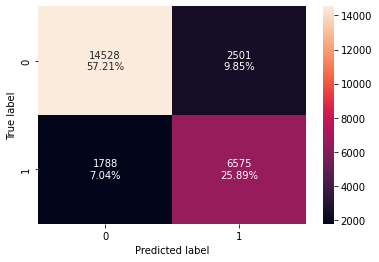

In [ ]:
# create the confusion matrix for the train set for decision tree with set hyperparameters
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
# Check the performance of the test set for decision tree with set hyperparameters
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.831089,0.786201,0.724438,0.754057


#### Performance on test set

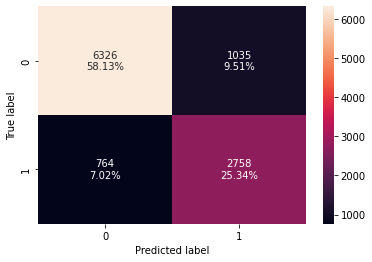

In [ ]:
# create the confusion matrix for the test set for decision tree with set hyperparameters
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
# Check the performance of the test set for decision tree with set hyperparameters
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.834696,0.783078,0.727129,0.754067


Observations:

* The f1_scores of the model using balanced class weights are ~0.754 and 0.754 for the train and test sets respectively.

* These are good f1_scores as stated above are equal suggesting no overfitting.

* Another model will built considering the cost complexity parameter alphas.

#### Determining the most important features

In [ ]:
# Determine the important features
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

#### Visualising the decision tree of the tuned hyperparameter model

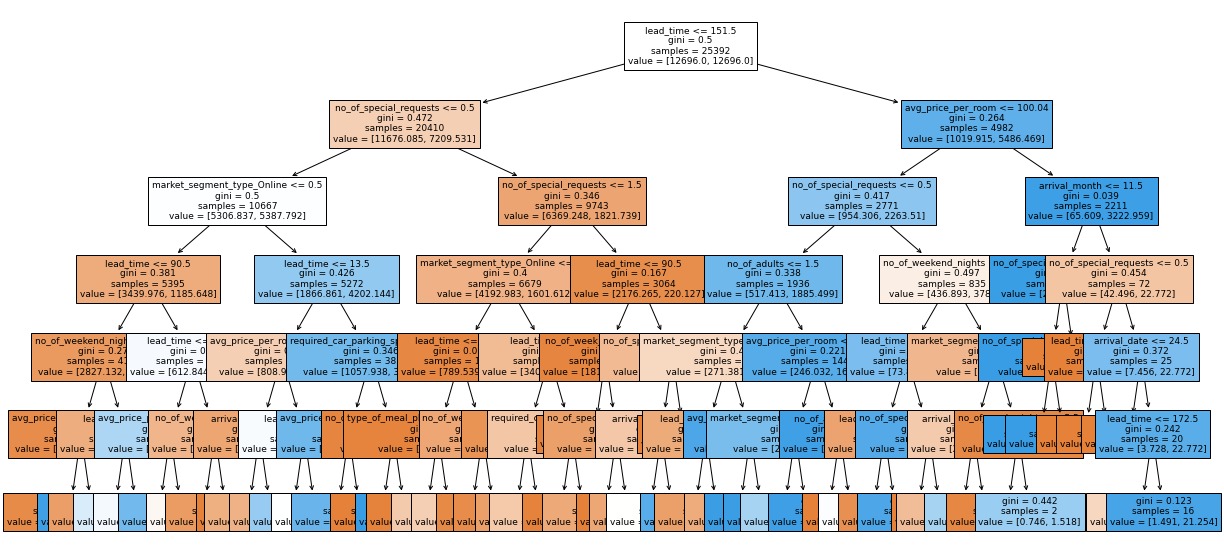

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

Observations:

- The maximum depth is 6

#### Decision tree text report for the hyperparameter tuned model.

In [ ]:
# Text report showing the rules of the decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

**Observations from the pre-pruned tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* When lead time is less than or equal to 90.5, number of weekend nights is less than or equal to 0.50, and average price per room is greater than 196.5, then booking status is most likely to be canceled.

* When lead time is greater than 90.5 and less than or equal to 117.50, average price per room is less than or equal to 93.58, then booking will most likely be canceled.

* When average price per room is greater than or equal to 100.04, arrival month is less than or equal to 11.5, and number of special requests is less than or equal to 2.5, then booking are most likely to be canceled.

* When lead time is greater than 151.5 and less than or equal to 163.5, average price per room is less than or equal to 100.5, number of special requests is less than 0.5, number of adults is less than 1.50 and the online market segment is less than or equal to 0.5, then booking is most like to be canceled.

* When lead time is greater than 172.5 then booking is most like to be canceled.

* When lead time is greater than 180.5, number of special request is less than of equal to 2.5, then booking is most likely to be canceled.

#### Horizontal Barchart of Model Importance.

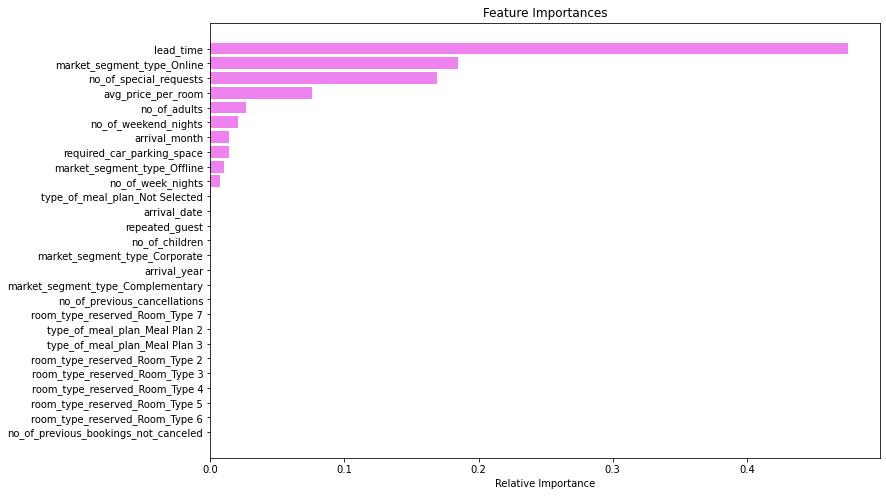

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre-tuned decision tree lead time, market segment type online, no. of special requests and average price per room are the top 4 most important features in the listed order.

### Decision Tree (Post pruning)

#### Cost Complexity Alphas and Impurities

In [ ]:
# Determine the effective alphas and impurities of pruning the decision tree
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
# Make a dataframe of the effective alphas and impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.008376
1,0.000000e+00,0.008376
2,2.933821e-20,0.008376
3,2.933821e-20,0.008376
4,2.933821e-20,0.008376
...,...,...
1846,8.901596e-03,0.328058
1847,9.802243e-03,0.337860
1848,1.271875e-02,0.350579
1849,3.412090e-02,0.418821


* The last cost complexity alpha refers to the alpha value of the root node.

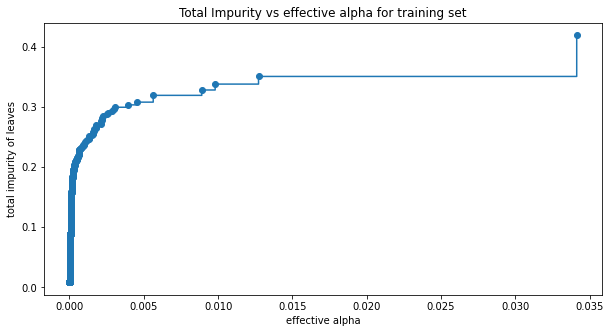

In [ ]:
# Visualise a plot of the effective alphas and Total Impurity for the training set
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

* As the effective alphas increase, the total impurity of leaves also increase.

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

#### Training the Decision Tree

In [ ]:
# Train the decision tree by pruning up to its root node
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136932


#### Visualisation of Effective Alphas Against the Nodes and Depths

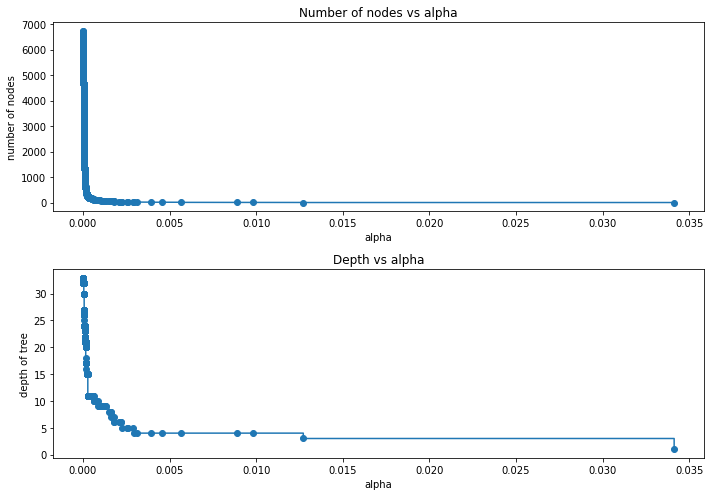

In [ ]:
# Visualise a plot of the effective alphas against the Number of nodes and Depth
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

* As cost complexity alpha increases, the number of node and tree depth decrease.

#### F1 Score vs alpha for training and testing sets

In [ ]:
# Write the loops to determine the F1 scores for the train and test sets
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

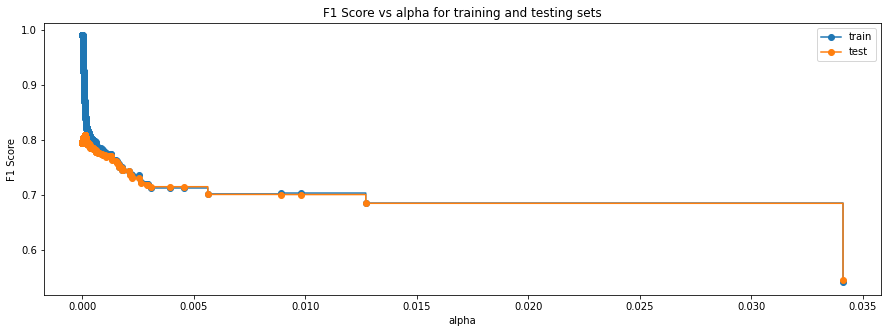

In [ ]:
# Visualise a plot for the F1 score and effective alphas for the test and training sets.
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

When ``ccp_alpha`` is set to zero and keeping the other default parameters
of `DecisionTreeClassifier`, the tree overfits, leading to
an training set F1_score of ~99% and test set F1_score of 82%. As alpha increases and the tree gets pruned the decision tree is able to make better generalisations.

In [ ]:
# create the model with the highest train and test F1 scores
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167026,
                       class_weight='balanced', random_state=1)


#### Confusion Matrix and Performance Test for the Train and Test sets (Post-Pruning)

#### Checking performance on training set

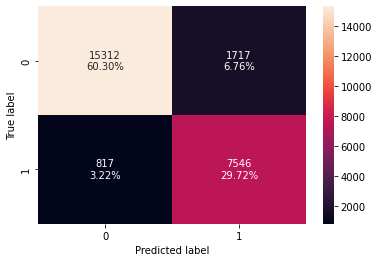

In [ ]:
# create the confusion matrix of the best model on the train set
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
# Check the performance of the best model on the train set
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.900205,0.902308,0.814639,0.856235


#### Checking performance on test set

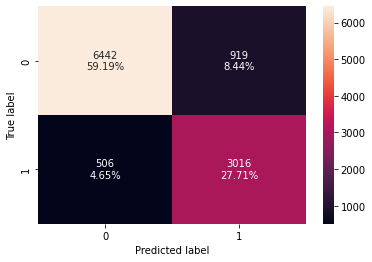

In [ ]:
# create the confusion matrix of the best model on the test set
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
# create the confusion matrix of the best model on the test set
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.869062,0.856332,0.766455,0.808904


* In the post-pruned tree, the model is giving ~0.86 and ~0.81 on the train and test sets for the F1_scores.

* Since the F1_scores are comparable, it means that the model can generalise well on out of sample data and there is no overfitting.

#### Visualise the decision tree after post-pruning

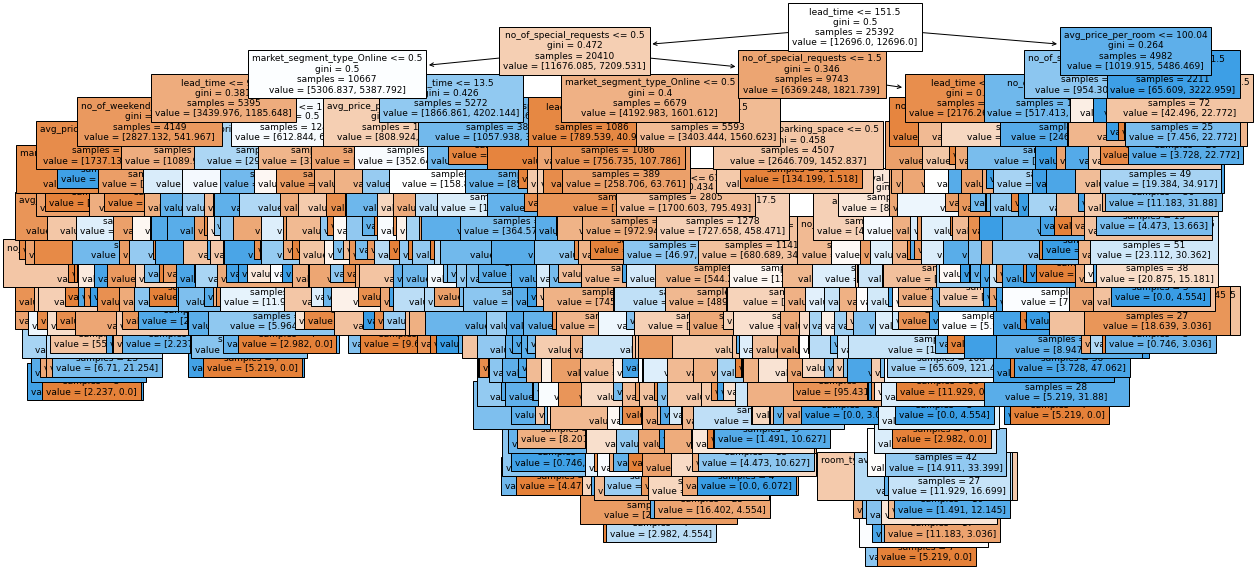

In [ ]:
# Visualise the Post-pruned decision tree
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### Decision tree text report for the post-pruned model.

In [ ]:
# Text report showing the rules of the decision tree

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

### Comparing the Decision Tree Models

#### Comparison of the train set

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train_balanced.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Without Class Weight",
    "Decision Tree With Class Weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training set performance comparison:")
models_train_comp_df

Training set performance comparison:


,Decision Tree Without Class Weight,Decision Tree With Class Weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.994211,0.993108,0.831089,0.900205
Recall,0.986608,0.995097,0.786201,0.902308
Precision,0.995776,0.984153,0.724438,0.814639
F1,0.991171,0.989595,0.754057,0.856235


#### Comparison of the test set

In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test_balanced.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree Without Class Weight",
    "Decision Tree With Class Weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree Without Class Weight,Decision Tree With Class Weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.870900,0.865570,0.834696,0.869062
Recall,0.811471,0.807496,0.783078,0.856332
Precision,0.794109,0.783687,0.727129,0.766455
F1,0.802696,0.795413,0.754067,0.808904


* Decision tree models with pre-pruning and post-pruning both are giving high recall scores on both the training and test sets.
* However, the post-pruned tree is chosen as the best model since it is giving a higher F1 score and higher precision score on the train and test sets than the pre-pruned tree.

## Actionable Insights and Recommendations

- The decision tree model built can be used to predict if a booking will be canceled or not and can correctly identify 86%% of canceled bookings while the logistic regression model can be used to predict 70% of the canceled bookings correctly. Both models can be used.

- The most important features that influence booking status (canceled or not canceled) are lead time, online market segment number of special requests, average price per room, number of weekend nights, number of adults, arrival month, number of required car parking spaces, offline market segment, number of weeknights.

- INN Hotels should provide incentives or promo offer to new  because guests new guests are more likely to cancel bookings than returning guests.

- INN Hotels should also optimise for the best prices because most booking cancellation are made on the higher room prices.

- INN Hotels should consider developing refund and cancellation policy which itemises the specific rates depending on the lead times. Longer lead times should attract higher rates while lesser rates should be applied to prepaid payments and pre-check-in payments.

- INN Hotels should also adopt a minimum cancellation time of not less than 36 hours but is flexible with respect to the months of the year. That is, during the non-summer months, booking cancellation cannot be done, say, less than 48 hours.

- Depending on the arrival month, booking cancellation predictions, or cancellation history, INN Hotels can employ overbooking techniques to compensate for cancellations. However, plans should be put in place for guests who end up not canceling.

- Send reminder emails to guests who are likely to cancel notifying them of the cancellation policy and their applicable minimum number of hours to cancel. This is to enable early cancellation in order to resell rooms.

- INN Hotels should carry out further investigation on reasons for bookings since most of the booking were groups of 2. If these are romantic couples, INN Hotels could be able provide better services accordingly.